In [3]:
import mysql.connector
from mysql.connector import Error
from sqlalchemy import create_engine


#mysql database details
connection = mysql.connector.connect(host = 'localhost', user = 'root', password = 'chennai', database = 'tourism',auth_plugin='mysql_native_password')
mycursor = connection.cursor()


In [5]:
!pip install mysql-connector-python

In [7]:
import pandas as pd
import numpy as np

In [9]:
# sql querry for joining all tables
sql = """
SELECT t.TransactionId, u.UserId, t.visityear, t.visitmonth, t.attractionid, t.rating, u.contenentid, u.regionid, u.countryid, u.cityid, r.region, c.country, m.visitmode,
i.attractioncityid, i.attractiontypeid, i.attraction, i.attractionaddress, ct.contenent, cty.cityname, tp.attractiontype
FROM transaction t
INNER JOIN user u
ON t.userID = u.userID
inner join region r
on u.regionid = r.regionid
inner join country c
on c.countryid = u.countryid
inner join mode m
on m.visitmodeid = t.visitmode
inner join item i
on i.attractionid = t.attractionid
inner join continent ct
on ct.contenentid = u.contenentid
inner join city cty
on u.cityid = cty.cityid
inner join type tp
on tp.attractiontypeid = i.attractiontypeid

"""


mycursor.execute(sql)
data = mycursor.fetchall()
column_names = [data[0] for data in mycursor.description]


df = pd.DataFrame(data, columns = column_names)
df.head()


,TransactionId,UserId,visityear,visitmonth,attractionid,rating,contenentid,regionid,countryid,cityid,region,country,visitmode,attractioncityid,attractiontypeid,attraction,attractionaddress,contenent,cityname,attractiontype
0,0000051502,0000039119,2014,7,000824,4,01,02,0005,000011,East Africa,Kenya,Solo,01,076,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Africa,Nairobi,Religious Sites
1,0000100364,0000008505,2017,10,000749,4,01,02,0011,000040,East Africa,Zambia,Couples,01,093,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Africa,Solwezi,Waterfalls
2,0000071692,0000071291,2016,9,000748,4,01,03,0014,000052,North Africa,Egypt,Couples,01,072,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Africa,Cairo,Points of Interest & Landmarks
3,0000073822,0000021388,2015,5,000748,5,01,03,0014,000052,North Africa,Egypt,Couples,01,072,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Africa,Cairo,Points of Interest & Landmarks
4,0000050237,0000058774,2015,9,000824,4,01,03,0014,000052,North Africa,Egypt,Couples,01,076,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Africa,Cairo,Religious Sites


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18882 entries, 0 to 18881
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TransactionId      18882 non-null  object
 1   UserId             18882 non-null  object
 2   visityear          18882 non-null  int64 
 3   visitmonth         18882 non-null  int64 
 4   attractionid       18882 non-null  object
 5   rating             18882 non-null  int64 
 6   contenentid        18882 non-null  object
 7   regionid           18882 non-null  object
 8   countryid          18882 non-null  object
 9   cityid             18882 non-null  object
 10  region             18882 non-null  object
 11  country            18882 non-null  object
 12  visitmode          18882 non-null  object
 13  attractioncityid   18882 non-null  object
 14  attractiontypeid   18882 non-null  object
 15  attraction         18882 non-null  object
 16  attractionaddress  18882 non-null  objec

In [15]:
#checking if there are any null values
df.isnull().sum().any()

False

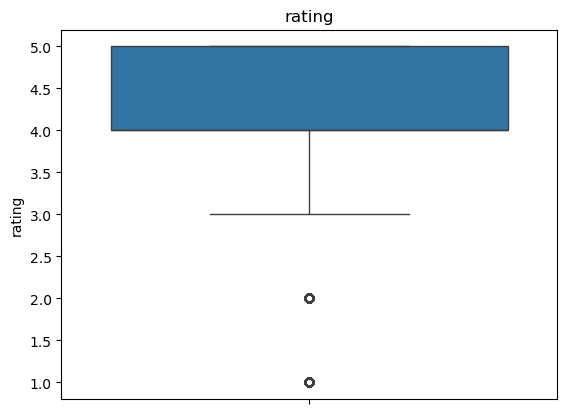

In [17]:
# to check if there are any outliers.
sns.boxplot(y=df['rating'])
plt.title('rating')
plt.show()

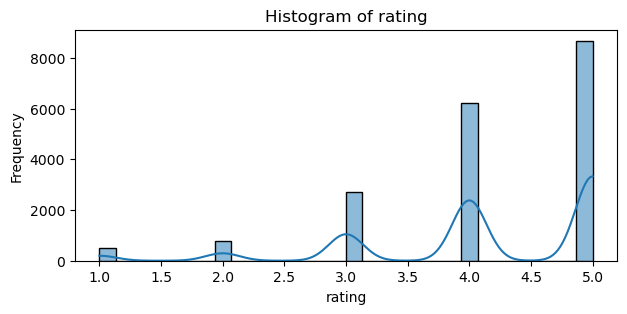

In [17]:
plt.figure(figsize = (7, 3))
sns.histplot(df['rating'], bins = 30, kde = True)
plt.title('Histogram of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

visityear
2013    4.150403
2014    4.192353
2015    4.227746
2016    4.161748
2017    4.074786
2018    4.056104
2019    4.235754
2020    4.285714
2021    4.000000
2022    4.170213
Name: rating, dtype: float64


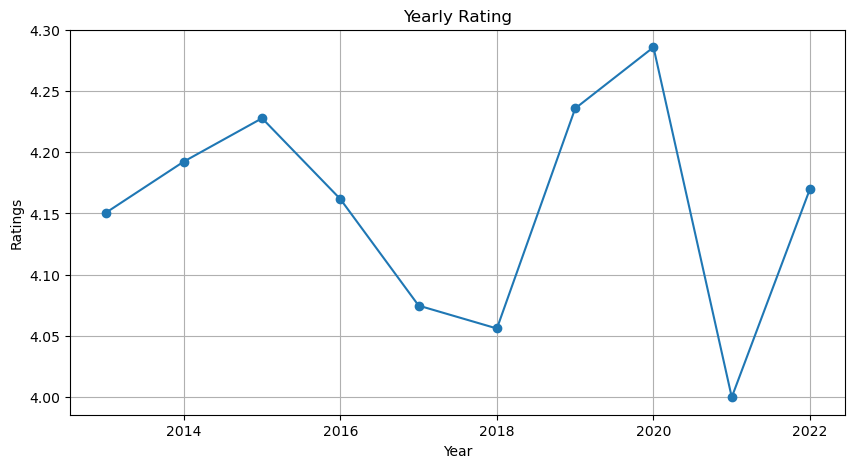

In [19]:
yearly_trend = df.groupby(df["visityear"])["rating"].mean()
print (yearly_trend)
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Rating")
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.grid()
plt.show()

In [21]:
#dropping columns that are not required
df.drop(['TransactionId'], axis = 1, inplace = True)
df.drop(['attractionid'], axis = 1, inplace = True)
df.drop(['contenentid'], axis = 1, inplace = True)
df.drop(['regionid'], axis = 1, inplace = True)
df.drop(['countryid'], axis = 1, inplace = True)
df.drop(['cityid'], axis = 1, inplace = True)
df.drop(['attractiontypeid'], axis = 1, inplace = True)

df.drop(['attractioncityid'], axis = 1, inplace = True)
df.head()

,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,0000039119,2014,7,4,East Africa,Kenya,Solo,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Africa,Nairobi,Religious Sites
1,0000008505,2017,10,4,East Africa,Zambia,Couples,Tegenungan Waterfall,"Jl. Raya Tegenungan, Kemenuh, Ubud 80581 Indon...",Africa,Solwezi,Waterfalls
2,0000071291,2016,9,4,North Africa,Egypt,Couples,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Africa,Cairo,Points of Interest & Landmarks
3,0000021388,2015,5,5,North Africa,Egypt,Couples,Tegalalang Rice Terrace,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",Africa,Cairo,Points of Interest & Landmarks
4,0000058774,2015,9,4,North Africa,Egypt,Couples,Uluwatu Temple,"Jl. Raya Uluwatu Southern part of Bali, Pecatu...",Africa,Cairo,Religious Sites


In [23]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


le = df.apply(LabelEncoder().fit_transform)

le.head(10)



,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,4617,1,6,3,7,46,4,26,11,0,879,11
1,896,4,9,3,7,87,1,24,10,0,1280,16
2,9493,3,8,3,11,29,1,23,3,0,170,10
3,2365,2,4,4,11,29,1,23,3,0,170,10
4,7875,2,8,3,11,29,1,26,11,0,170,11
5,10525,6,10,4,18,71,1,28,7,0,196,15
6,8861,3,10,1,18,71,1,23,3,0,196,10
7,454,4,11,3,18,71,2,14,20,0,197,2
8,11298,1,10,4,18,71,1,22,13,0,345,11
9,8126,0,5,4,18,71,2,28,7,0,346,15


In [25]:
#encoded data
le

,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,4617,1,6,3,7,46,4,26,11,0,879,11
1,896,4,9,3,7,87,1,24,10,0,1280,16
2,9493,3,8,3,11,29,1,23,3,0,170,10
3,2365,2,4,4,11,29,1,23,3,0,170,10
4,7875,2,8,3,11,29,1,26,11,0,170,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18877,9851,3,1,3,12,84,3,17,9,1,1260,8
18878,11743,3,2,4,12,84,1,17,9,1,1271,8
18879,3813,0,6,4,15,14,1,17,9,1,199,8
18880,9243,5,5,2,8,44,2,19,21,2,1545,2


In [27]:
#checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18877    False
18878    False
18879    False
18880    False
18881    False
Length: 18882, dtype: bool

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [30]:
X = le.drop("rating",axis=1)
y = le["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
model = DecisionTreeRegressor(random_state = 55)

# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


In [35]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 1.2673321185924744
Testing R2 Score : -0.6770761344489169

Training RMSE : 0.18228848148227686
Training R2 Score : 0.966725155559638


In [ ]:
#This shows that the model is overfitting

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [39]:
X = le.drop("rating",axis=1)
y = le["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
model = RandomForestRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [43]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.93174856937015
Testing R2 Score : 0.09349675118250533

Training RMSE : 0.38641242049441554
Training R2 Score : 0.8504798463665858


In [ ]:
#This shows that the model is overfitting

In [45]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [47]:
X = le.drop("rating",axis=1)
y = le["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
model = GradientBoostingRegressor(random_state = 42)


# Fitting the model
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [51]:
print('Testing RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Testing R2 Score :', metrics.r2_score(y_test, y_pred))

# Training performance 
print('\nTraining RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Training R2 Score :', metrics.r2_score(y_train, y_train_pred))

Testing RMSE : 0.919954171440206
Testing R2 Score : 0.11630116647687139

Training RMSE : 0.9196671210873544
Training R2 Score : 0.15304780043789956


In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
X = le.drop("visitmode", axis=1)
y = le["visitmode"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
model = RandomForestClassifier(random_state = 5)

# Fitting the data
model.fit(X_train, y_train)

# Taking predictions from the model
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [59]:
print('Testing Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred, average = 'weighted'), 2))

# Training Performance
print('\nTraining Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

Testing Accuracy : 0.53
Testing Precision : 0.52
Testing Recall : 0.53
Testing F1 Score : 0.5

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0


In [61]:
# for clustering trying the KMeans clustering method.
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='attraction', ylabel='Density'>

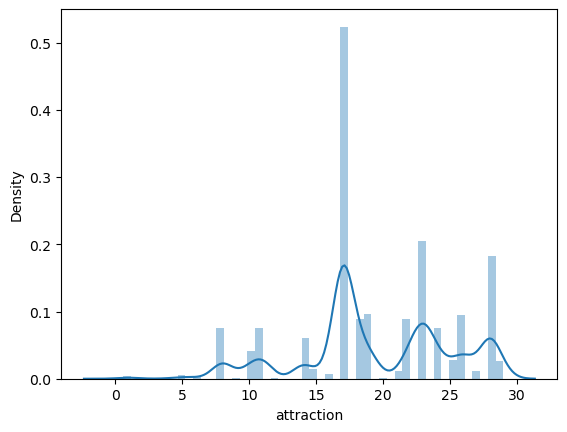

In [63]:
import seaborn as sns
sns.distplot(le['attraction'], kde = True)

In [65]:
le.head()

,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,4617,1,6,3,7,46,4,26,11,0,879,11
1,896,4,9,3,7,87,1,24,10,0,1280,16
2,9493,3,8,3,11,29,1,23,3,0,170,10
3,2365,2,4,4,11,29,1,23,3,0,170,10
4,7875,2,8,3,11,29,1,26,11,0,170,11


<Axes: xlabel='rating', ylabel='Density'>

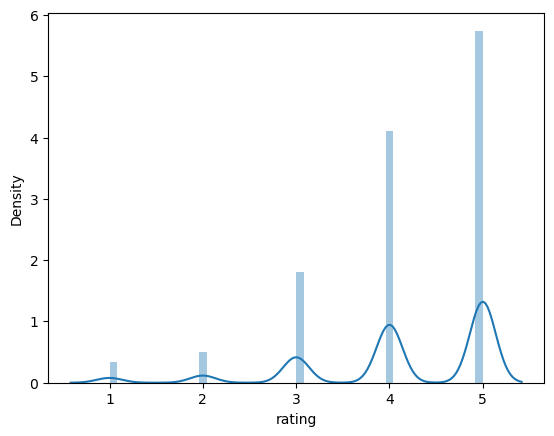

In [67]:
sns.distplot(df['rating'], kde = True)

In [69]:
scaler = StandardScaler()
le[['attraction', 'rating']] = scaler.fit_transform(le[['attraction', 'rating']])
le.head()

,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,4617,1,6,-0.153845,7,46,4,1.165703,11,0,879,11
1,896,4,9,-0.153845,7,87,1,0.810496,10,0,1280,16
2,9493,3,8,-0.153845,11,29,1,0.632892,3,0,170,10
3,2365,2,4,0.853052,11,29,1,0.632892,3,0,170,10
4,7875,2,8,-0.153845,11,29,1,1.165703,11,0,170,11


In [71]:
# Creating an empty list
distortions = []
inertia = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making an array
array1 = le['attraction'].to_numpy()
array2 = le['rating'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

# for() loop
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0])
    inertia.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.2466496864206493
2 : 0.9690054843226485
3 : 0.7722740012940706
4 : 0.6863542177588033
5 : 0.595253761343345
6 : 0.537037417404813
7 : 0.4682705685617404
8 : 0.38767054234271764
9 : 0.3040844862827689
10 : 0.2881005055642814
11 : 0.29671226761346603
12 : 0.21325013891166691
13 : 0.2206727461409472
14 : 0.18176782771068434


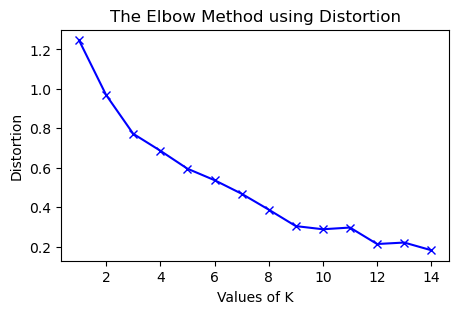

In [73]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

# Plot
plt.figure(figsize = (5, 3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# The optimal number of clusters is 11 using inertia.

1 : 37764.00000000018
2 : 24451.756834226602
3 : 14003.327739621976
4 : 11134.978652958276
5 : 9198.150446961225
6 : 7974.375376120577
7 : 6125.092359006393
8 : 4363.687169377684
9 : 3597.5348442200334
10 : 3404.7540730410283
11 : 2854.07284390308
12 : 2051.3799946395548
13 : 1958.7427981483531
14 : 1451.5432228874552


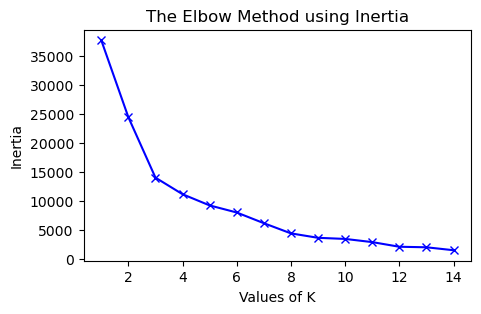

In [75]:
# Using inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

# Plot
plt.figure(figsize = (5, 3))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
# The optimal number of clusters is 3 using inertia.

In [77]:
# Creating optimal number of clusters
data = pd.DataFrame(array, columns = ['attraction', 'rating'])

# Creating Optimal Clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

# Getting the centroids
centroids = kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[-0.27677361 -1.62957884]
 [-0.67075625  0.4095935 ]
 [ 1.02129748  0.42423124]]


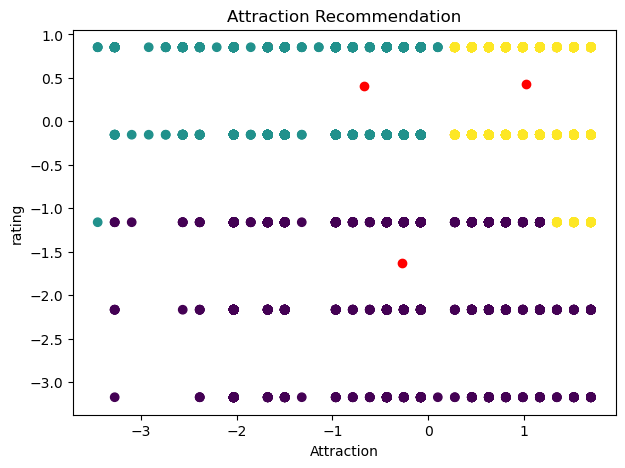

In [79]:
# Plot
plt.figure(figsize = (7, 5))
plt.scatter(data['attraction'], data['rating'],
            c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Attraction')
plt.ylabel('rating')
plt.title('Attraction Recommendation')
plt.show()

In [81]:
le.head()

,UserId,visityear,visitmonth,rating,region,country,visitmode,attraction,attractionaddress,contenent,cityname,attractiontype
0,4617,1,6,-0.153845,7,46,4,1.165703,11,0,879,11
1,896,4,9,-0.153845,7,87,1,0.810496,10,0,1280,16
2,9493,3,8,-0.153845,11,29,1,0.632892,3,0,170,10
3,2365,2,4,0.853052,11,29,1,0.632892,3,0,170,10
4,7875,2,8,-0.153845,11,29,1,1.165703,11,0,170,11


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
X = le[["visityear", "visitmonth", "attractiontype"]]
y_reg = le["rating"]
y_clf = le["visitmode"]

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)
print("Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train_clf)
y_pred_clf = classifier.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test_clf, y_pred_clf))



Regression MSE: 0.9557806787652628
Classification Accuracy: 0.46518400847233254


In [85]:
#pickling process
import pickle
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
# Assume X_train and y_train are your training data
model1.fit(X_train, y_train_clf)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model1, file)


# Load the model
with open('model.pkl', 'rb') as file:
    model1 = pickle.load(file)




In [87]:
#pickling process

model2 = LinearRegression()
# Assume X_train and y_train are your training data
model2.fit(X_train, y_train_reg)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model2, file)

# Load the model
with open('model.pkl', 'rb') as file:
    model2 = pickle.load(file)

